# Activity: Explore hypothesis testing

## Introduction

You work for an environmental think tank called Repair Our Air (ROA). ROA is formulating policy recommendations to improve the air quality in America, using the Environmental Protection Agency's Air Quality Index (AQI) to guide their decision making. An AQI value close to 0 signals "little to no" public health concern, while higher values are associated with increased risk to public health. 

They've tasked you with leveraging AQI data to help them prioritize their strategy for improving air quality in America.

ROA is considering the following decisions. For each, construct a hypothesis test and an accompanying visualization, using your results of that test to make a recommendation:

1. ROA is considering a metropolitan-focused approach. Within California, they want to know if the mean AQI in Los Angeles County is statistically different from the rest of California.
2. With limited resources, ROA has to choose between New York and Ohio for their next regional office. Does New York have a lower AQI than Ohio?
3. A new policy will affect those states with a mean AQI of 10 or greater. Can you rule out Michigan from being affected by this new policy?

**Notes:**
1. For your analysis, you'll default to a 5% level of significance.
2. Throughout the lab, for two-sample t-tests, use Welch's t-test (i.e., setting the `equal_var` parameter to `False` in `scipy.stats.ttest_ind()`). This will account for the possibly unequal variances between the two groups in the comparison.

## Step 1: Imports

To proceed with your analysis, import `pandas` and `numpy`. To conduct your hypothesis testing, import `stats` from `scipy`.

#### Import Packages

In [1]:
# Import relevant packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

You are also provided with a dataset with national Air Quality Index (AQI) measurements by state over time for this analysis. `Pandas` was used to import the file `c4_epa_air_quality.csv` as a dataframe named `aqi`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

**Note:** For purposes of your analysis, you can assume this data is randomly sampled from a larger population.

#### Load Dataset

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

aqi = pd.read_csv('c4_epa_air_quality.csv')

## Step 2: Data Exploration

### Before proceeding to your deliverables, explore your datasets.

Use the following space to surface descriptive statistics about your data. In particular, explore whether you believe the research questions you were given are readily answerable with this data.

In [3]:
# Explore your dataframe `aqi` here:
aqi.head()

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


In [4]:
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        260 non-null    int64  
 1   date_local        260 non-null    object 
 2   state_name        260 non-null    object 
 3   county_name       260 non-null    object 
 4   city_name         260 non-null    object 
 5   local_site_name   257 non-null    object 
 6   parameter_name    260 non-null    object 
 7   units_of_measure  260 non-null    object 
 8   arithmetic_mean   260 non-null    float64
 9   aqi               260 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 20.4+ KB


In [5]:
aqi.drop('Unnamed: 0', axis=1 ,inplace = True)

In [6]:
aqi.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


In [7]:
aqi[aqi.isnull().any(axis=1)]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
55,2018-01-01,West Virginia,Kanawha,Charleston,NaN,Carbon monoxide,Parts per million,0.226316,3
258,2018-01-01,Nebraska,Douglas,Omaha,NaN,Carbon monoxide,Parts per million,0.421053,9


In [8]:
aqi[aqi.duplicated()]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi


In [9]:
aqi.describe()['aqi'].round()

count    260.0
mean       7.0
std        7.0
min        0.0
25%        2.0
50%        5.0
75%        9.0
max       50.0
Name: aqi, dtype: float64

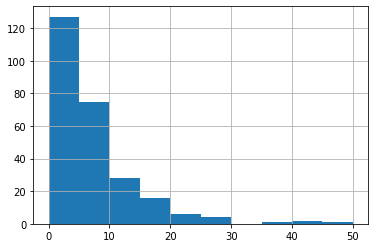

In [10]:
aqi['aqi'].hist();

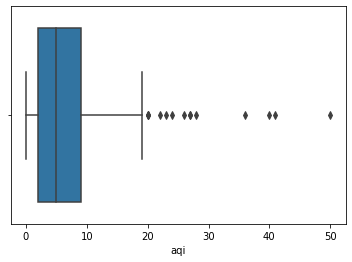

In [11]:
sns.boxplot(aqi['aqi']);

In [12]:
len(aqi['state_name'].unique())

52

In [13]:
len(aqi['county_name'].unique())

149

In [14]:
len(aqi['city_name'].unique())

190

In [49]:
aqi.loc[(aqi['state_name']=='Ohio') | (aqi['state_name'] == 'New York')]['state_name'].value_counts()

Ohio        12
New York    10
Name: state_name, dtype: int64

In [53]:
aqi.loc[aqi['state_name'] == 'California']['county_name'].value_counts()

Los Angeles       14
San Bernardino     6
Santa Barbara      5
Riverside          5
Alameda            4
Orange             3
Fresno             3
Contra Costa       3
Sacramento         3
San Diego          2
Santa Clara        2
Kern               2
San Joaquin        1
Butte              1
Humboldt           1
Imperial           1
San Mateo          1
Marin              1
San Francisco      1
Stanislaus         1
Inyo               1
Madera             1
Sonoma             1
Napa               1
Monterey           1
Solano             1
Name: county_name, dtype: int64

In [56]:
aqi.loc[aqi['state_name'] == 'Michigan']['aqi'].describe().round(2)

count     9.00
mean      8.11
std       3.26
min       2.00
25%       7.00
50%       8.00
75%      10.00
max      13.00
Name: aqi, dtype: float64

<details>
  <summary><h4><strong>HINT 1</strong></h4></summary>

  Consider referring to the material on descriptive statisics.
</details>

<details>
  <summary><h4><strong>HINT 2</strong></h4></summary>

  Consider using `pandas` or `numpy` to explore the `aqi` dataframe.
</details>

<details>
  <summary><h4><strong>HINT 3</strong></h4></summary>

Any of the following functions may be useful:
- `pandas`: `describe()`,`value_counts()`,`shape()`, `head()`
- `numpy`: `unique()`,`mean()`
    
</details>

#### **Question 1: From the preceding data exploration, what do you recognize?**

**Answer:**  
* The data have 3 null values in the `local_site_name` variable. Those null values won't affect my analysis therefore there is no harm in remaining among the data.
* There was an unnecessary index column which I dropped.
* I do not have duplicated observations.
* I have 52 states, 149 counties, and 190 cities as unique values in my dataset.
* The AQI column has a mean of 7 and a median of 5 indicating outliers with a right skewed distribution.
* This can be confirmed via the boxplot and the histplot. We can see outlier values that stand ~ above the 20th aqi level.
* The range of the aqi column has a min of 0 and a max of 50.

## Step 3. Statistical Tests

Before you proceed, recall the following steps for conducting hypothesis testing:

1. Formulate the null hypothesis and the alternative hypothesis.<br>
2. Set the significance level.<br>
3. Determine the appropriate test procedure.<br>
4. Compute the p-value.<br>
5. Draw your conclusion.

### Hypothesis 1: ROA is considering a metropolitan-focused approach. Within California, they want to know if the mean AQI in Los Angeles County is statistically different from the rest of California.

Before proceeding with your analysis, it will be helpful to subset the data for your comparison.

In [19]:
# Create dataframes for each sample being compared in your test
california = aqi.loc[(aqi['state_name'] == 'California')&(aqi['county_name']!='Los Angeles')]
los_angeles = aqi.loc[aqi['county_name'] == 'Los Angeles']

In [22]:
mean_cal=california['aqi'].mean()
mean_cal

11.0

In [23]:
mean_los_ang = los_angeles['aqi'].mean()
mean_los_ang

16.285714285714285

In [24]:
mean_los_ang - mean_cal

5.285714285714285

<details>
  <summary><h4><strong>HINT 1</strong></h4></summary>

  Consider referencing the material on subsetting dataframes.  
</details>

<details>
  <summary><h4><strong>HINT 2</strong></h4></summary>

  Consider creating two dataframes, one for Los Angeles, and one for all other California observations.
</details>

<details>
  <summary><h4><strong>HINT 3</strong></h4></summary>

For your first dataframe, filter to `county_name` of `Los Angeles`. For your second dataframe, filter to `state_name` of `Calfornia` and `county_name` not equal to `Los Angeles`.
    
</details>

#### Formulate your hypothesis:

**Formulate your null and alternative hypotheses:**

*   $H_0$: There is no difference in the mean AQI between Los Angeles County and the rest of California.
*   $H_A$: There is a difference in the mean AQI between Los Angeles County and the rest of California.


#### Set the significance level:

In [25]:
# For this analysis, the significance level is 5%
sign_level = 0.05

#### Determine the appropriate test procedure:

Here, you are comparing the sample means between two independent samples. Therefore, you will utilize a **two-sample  𝑡-test**.

#### Compute the P-value

In [57]:
# Compute your p-value here
statistic , p_value = stats.ttest_ind(a=los_angeles['aqi'],b=california['aqi'],equal_var=False)
print('statistic = ',statistic)
print('P-value = ',p_value)

statistic =  2.1107010796372014
P-value =  0.049839056842410995


In [58]:
p_value < sign_level 

True

<details>
  <summary><h4><strong>HINT 1</strong></h4></summary>

  Consider referencing the material on how to perform a two-sample t-test.
</details>

<details>
  <summary><h4><strong>HINT 2</strong></h4></summary>

  In `ttest_ind()`, a is the aqi column from our "Los Angeles" dataframe, and b is the aqi column from the "Other California" dataframe.
</details>

<details>
  <summary><h4><strong>HINT 3</strong></h4></summary>

  Be sure to set `equal_var` = False.

</details>

#### **Question 2. What is your P-value for hypothesis 1, and what does this indicate for your null hypothesis?**

**Answer:**  
* The calculated p-value based on the sampled data is 0.049 (~0.05 or 5%)
* We do know that:
    - when `p-value > confidence_level` then we `fail to reject` the null hypothesis while,
    - when `p-value < confidence_level` then we `reject` the null hypothesis and we say that there is a statistical significance
   based on that rule, we can say that `we reject the null hypothesis` as p = 0.049 < sign_level = 0.05

### Hypothesis 2: With limited resources, ROA has to choose between New York and Ohio for their next regional office. Does New York have a lower AQI than Ohio?

Before proceeding with your analysis, it will be helpful to subset the data for your comparison.

In [64]:
# Create dataframes for each sample being compared in your test
new_york = aqi.loc[aqi['state_name'] == 'New York']
ohio = aqi.loc[aqi['state_name'] == 'Ohio']

In [65]:
mean_new_york = new_york['aqi'].mean()
mean_ohio = ohio['aqi'].mean()
print('AQI mean of New York:' ,mean_new_york)
print('AQI mean of Ohio:' ,mean_ohio)

AQI mean of New York: 2.5
AQI mean of Ohio: 3.3333333333333335


In [66]:
mean_ohio - mean_new_york

0.8333333333333335

<details>
  <summary><h4><strong>HINT 1</strong></h4></summary>

  Consider referencing the materials on subsetting dataframes.  
</details>

<details>
  <summary><h4><strong>HINT 2</strong></h4></summary>

  Consider creating two dataframes, one for New York, and one for Ohio observations.
</details>

<details>
  <summary><h4><strong>HINT 3</strong></h4></summary>

For your first dataframe, filter to `state_name` of `New York`. For your second dataframe, filter to `state_name` of `Ohio`.
    
</details>

#### Formulate your hypothesis:

**Formulate your null and alternative hypotheses:**

*   $H_0$: The mean AQI of New York is greater than or equal to that of Ohio.
*   $H_A$: The mean AQI of New York is **below** that of Ohio.


#### Significance Level (remains at 5%)

#### Determine the appropriate test procedure:

Here, you are comparing the sample means between two independent samples in one direction. Therefore, you will utilize a **two-sample  𝑡-test**.

#### Compute the P-value

In [67]:
statistic, p_value = stats.ttest_ind(a=new_york['aqi'],b=ohio['aqi'],equal_var=False, alternative = 'less')
print('Statistic = ',statistic)
print('P-value = ', p_value)

Statistic =  -2.025951038880333
P-value =  0.030446502691934697


In [68]:
p_value < sign_level

True

<details>
  <summary><h4><strong>HINT 1</strong></h4></summary>

  Consider referencing the material on how to perform a two-sample t-test.
</details>

<details>
  <summary><h4><strong>HINT 2</strong></h4></summary>

  In `ttest_ind()`, a is the aqi column from the "New York" dataframe, an b is the aqi column from the "Ohio" dataframe.
</details>

<details>
  <summary><h4><strong>HINT 3</strong></h4></summary>

  You can assign `tstat`, `pvalue` to the output of `ttest_ind`. Be sure to include `alternative = less` as part of your code.  

</details>

#### **Question 3. What is your P-value for hypothesis 2, and what does this indicate for your null hypothesis?**

**Answer:**  
* The p-value is equal to 3%
* This means that  the difference observed between the two sampled means is not likely to be due to chance. Therefore we reject the null hypothesis.

###  Hypothesis 3: A new policy will affect those states with a mean AQI of 10 or greater. Can you rule out Michigan from being affected by this new policy?

Before proceeding with your analysis, it will be helpful to subset the data for your comparison.

In [39]:
# Create dataframes for each sample being compared in your test
michigan = aqi.loc[aqi['state_name'] == 'Michigan']
mean_mich = michigan['aqi'].mean()
mean_mich

8.11111111111111

In [40]:
10 - mean_mich

1.8888888888888893

<details>
  <summary><h4><strong>HINT 1</strong></h4></summary>

  Consider referencing the material on subsetting dataframes.  
</details>

<details>
  <summary><h4><strong>HINT 2</strong></h4></summary>

  Consider creating one dataframe which only includes Michigan.
</details>

#### Formulate your hypothesis:

**Formulate your null and alternative hypotheses here:**

*   $H_0$: The mean AQI of Michigan is less than or equal to 10.
*   $H_A$: The mean AQI of Michigan is greater than 10.


#### Significance Level (remains at 5%)

#### Determine the appropriate test procedure:

Here, you are comparing one sample mean relative to a particular value in one direction. Therefore, you will utilize a **one-sample  𝑡-test**. 

#### Compute the P-value

In [44]:
# Compute your p-value here:
statistic, p_value = stats.ttest_1samp(a = michigan['aqi'], alternative = 'greater', popmean = 10)
print('Statistic = ',statistic)
print('P-value = ',p_value)

Statistic =  -1.7395913343286131
P-value =  0.9399405193140109


In [42]:
p_value < sign_level

False

<details>
  <summary><h4><strong>HINT 1</strong></h4></summary>

  Consider referencing the material on how to perform a one-sample t-test.
</details>

<details>
  <summary><h4><strong>HINT 2</strong></h4></summary>

  In `ttest_1samp)`, you are comparing the aqi column from your Michigan data relative to 10, the new policy threshold.
</details>

<details>
  <summary><h4><strong>HINT 3</strong></h4></summary>

  You can assign `tstat`, `pvalue` to the output of `ttest_1samp`. Be sure to include `alternative = greater` as part of your code.  

</details>

#### **Question 4. What is your P-value for hypothesis 3, and what does this indicate for your null hypothesis?**

**Answer:**  
* The p-value is 94%.
* This means that we failed to reject the null hypothesis as it seems to be highly likely that the mean AQI of Michigan is less than or equal to 10.

## Step 4. Results and Evaluation

Now that you've completed your statistical tests, you can consider your hypotheses and the results you gathered.

#### **Question 5. Did your results show that the AQI in Los Angeles County was statistically different from the rest of California?**

**Answer:**  
As we slightly rejected the null hypothesis based on the p-value and a 5% significance level, we can say that the difference between Los Angeles and the rest of California is statistically significant.

#### **Question 6. Did New York or Ohio have a lower AQI?**

**Answer:**  
Considering that New York is sample A and Ohio is sample B, then based on a 5% significance level and a p-value equal to 3% we reject the null hypothesis which states that New York has a mean greater or equal to the mean of Ohio. Therefore we can claim that based on our findings, New York has either a lower or an equal AQI mean compared to Ohio.

#### **Question 7: Will Michigan be affected by the new policy impacting states with a mean AQI of 10 or greater?**



**Answer:**  
As we failed to reject the null hypothesis the Michigan seems that is highly likely that won't be affected by the new policy.

# Conclusion

**What are key takeaways from this lab?**  
**Answer:**  
* To condact a hypothesis testing we need to follow the below steps in order:
    1. State the null & alternative hypothesis.
    2. Choose the significance level.
    3. Determine the apropriate test procedure.
    4. Calculate the p-value.
    5. Draw conclusions.
* We can compute the p-value utilizing python via the scipy module stats.
* We can draw conclusions to spot statistical significance by comparing the p-value with the set significance level.

**What would you consider presenting to your manager as part of your findings?**  
**Answer:**  
* I would present my finding stating that:
    1. There is statistical significance in the difference observed between the mean AQI of Los Angeles and the mean AQI of the rest of California. Based on evidence we can support that the ~5 aqi points of Los Angeles, above the rest of California, did not occur due to sampling variability but through air pollution factors.
    2. Based on the sampled data, the best choice between New York and Ohio for the next regional office of ROA, would be the Ohio county as it seems to have an equal or a lower AQI mean compared to New York.
    3. Based on the evidence, it seems that Michigan won't be affected by the new policy as we failed to rejected the null hypothesis stating that the mean AQI of Michigan is less than or equal to 10 which is the threashold of the new policy.
    
**What would you convey to external stakeholders?**  
**Answer:**  


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.